# 1 关联图correlation

## 1.2 气泡图

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#导入数据
midwest = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv')

In [5]:
midwest.head()

,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


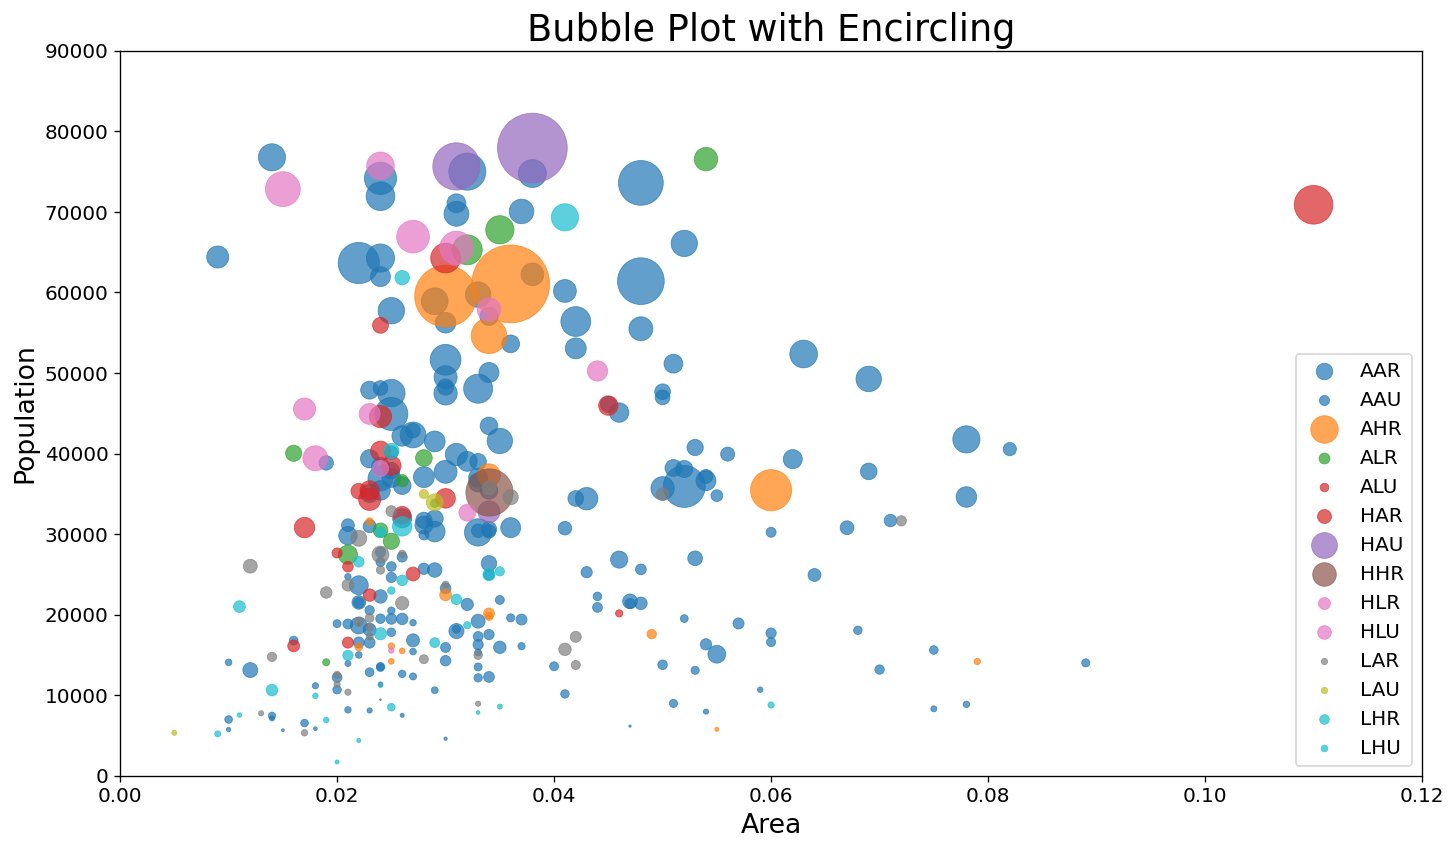

In [29]:
#预设图像的各种属性
large = 22
med = 16
small = 12
params = {
    'axes.titlesize': large, #子图上的标题字体大小
    'legend.fontsize':med, #图例字体大小
    'figure.figsize':(16,10), #画布大小
    'axes.labelsize':med, #标签的字体大小
    'xtick.labelsize':med, #x轴上的标尺的字体大小
    'ytick.labelsize':med, #y轴上的标尺的字体大小
    'figure.titlesize':large #整个画布的标题字体大小
}
plt.rcParams.update(params) #设定各种各样的默认属性
#plt.style.use('seaborn-whitegrid') #设定整体风格
#sns.set_style('white') #设定整体背景风格

#准备标签列表和色彩列表
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

#布置画布
fig = plt.figure(figsize = (14,8), dpi = 120, facecolor = 'w', edgecolor = 'k')

#循环绘图
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal' #横坐标和纵坐标
                ,data = midwest.loc[midwest.category == category, :]
                #,s = midwest.loc[midwest.category == category, 'percasian'] * 500
                #,s = midwest.loc[:,'popasian'] #报错，size不同
                ,s = 'popasian' #以该特征为点的尺寸大小
                ,c = np.array(colors[i]).reshape(1,-1) #点的填充颜色
                ,edgecolors = np.array(colors[i]).reshape(1,-1) #点的边缘颜色
                ,label = str(category)
                ,alpha = 0.7 #图像的透明度
                ,linewidths = 0.5 #点的边缘的线宽
               )

#装饰图像
plt.gca().set(xlim = (0.0,0.12), ylim = (0,90000), xlabel = 'Area', ylabel = 'Population')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Bubble Plot with Encircling', fontsize = 22)
lgnd = plt.legend(fontsize = 12
                  ,markerscale = 0.5 #现有气泡的比例
                 )
plt.show()

参数s中可能出现的陷阱（可能已经不存在了）

In [7]:
midwest.loc[midwest['category'] == categories[0], 'area'].shape

(186,)

In [8]:
midwest.loc[midwest['category'] == categories[0], 'popasian'].shape

(186,)

In [9]:
midwest.loc[:, 'popasian'].shape

(332,)

In [10]:
X = np.arange(0,10,1)
X

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
y = [0,0,0,0,0,1,1,1,1,1]

In [24]:
sizes1 = [50,50,50,50,50,100,100,100,100,100]
#sizes2 = [50,50,50,50,50,100,100,100,100,100,200,200,200] #size不同(13和10)，会报错；旧版本取前10个数
#sizes2 = [50,50,50,50,50,100,100,200,200,200,100,100,100] #size不同(13和10)，会报错；旧版本取前10个数
#sizes2 = [50,100,200]#size不同(13和10)，会报错；旧版本循环多次，补成size相同

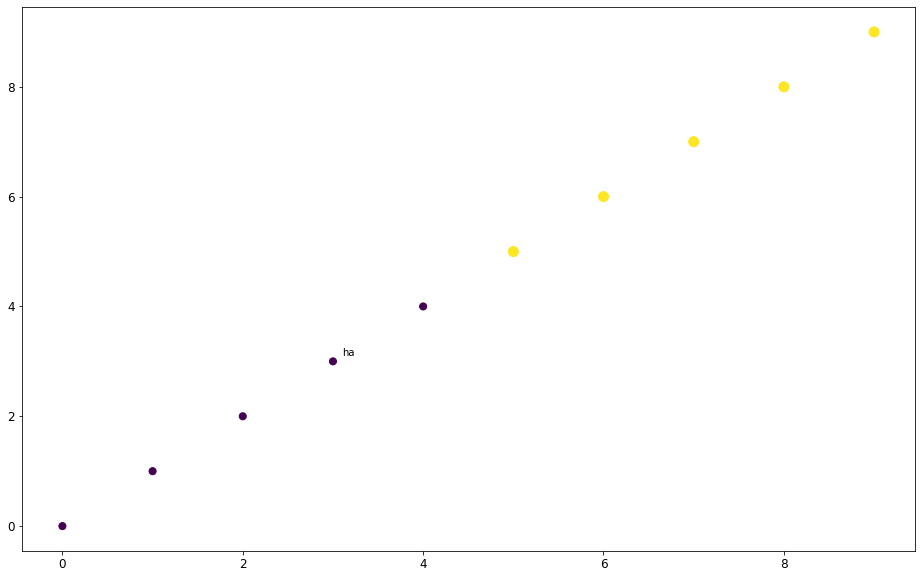

In [33]:
plt.scatter(X, X #横坐标和纵坐标
            ,s = sizes1
            #,s = sizes2
            ,c = y)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
#text中的前2个参数代表文字的位置
plt.text(X[3]+0.1, X[3]+0.1
         #,s = ['ha','ha','ha','ha','ha','hei','hei','hei','hei','hei'] #报错
         ,s = 'ha'
        )
plt.show()

图例为什么不能是一致大小？legend中的参数markerscale

给气泡图加上文字：plt.text()

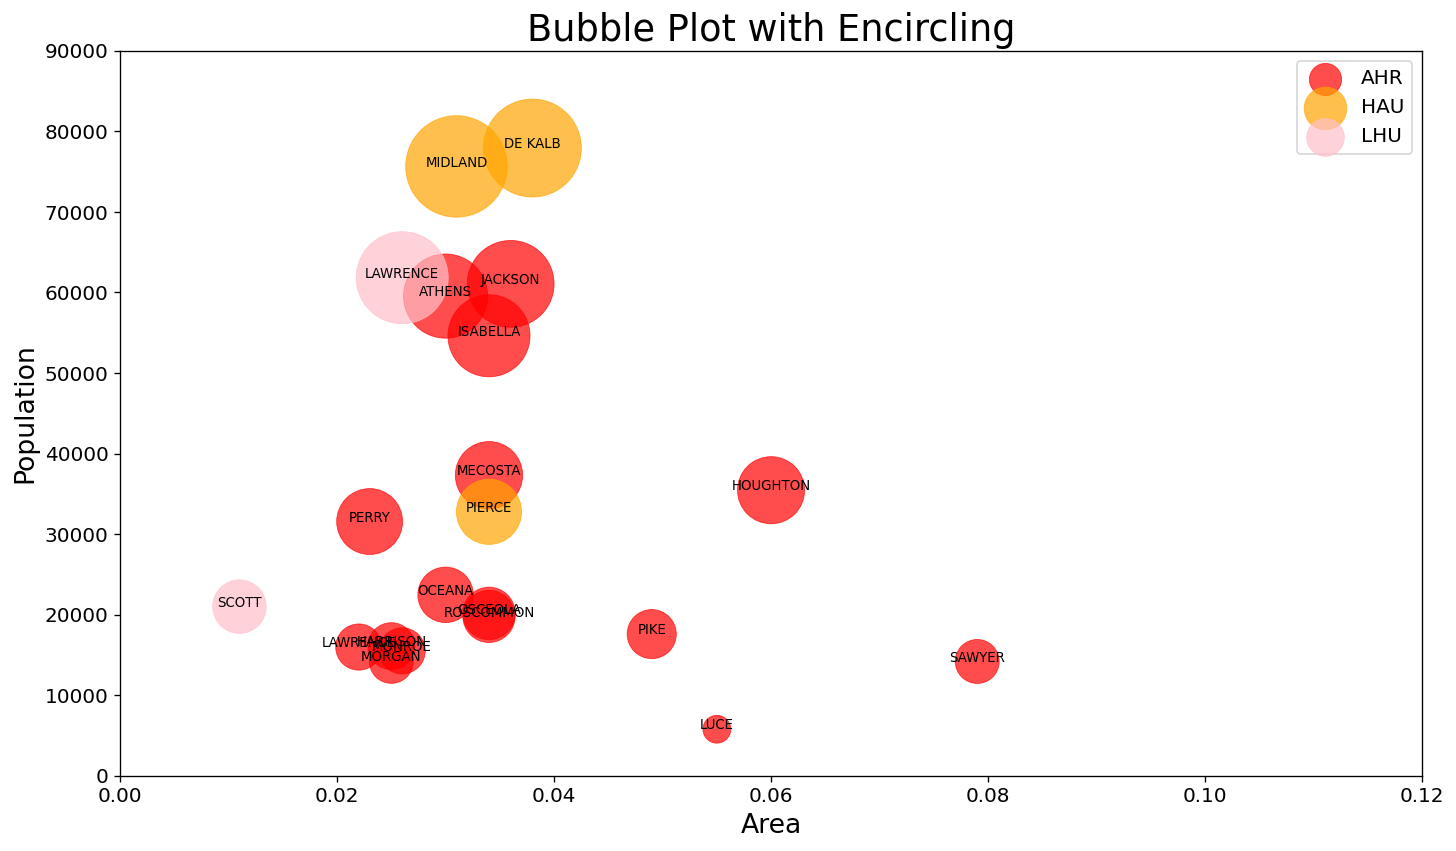

In [36]:
#预设图像的各种属性
large = 22
med = 16
small = 12
params = {
    'axes.titlesize': large, #子图上的标题字体大小
    'legend.fontsize':med, #图例字体大小
    'figure.figsize':(16,10), #画布大小
    'axes.labelsize':med, #标签的字体大小
    'xtick.labelsize':med, #x轴上的标尺的字体大小
    'ytick.labelsize':med, #y轴上的标尺的字体大小
    'figure.titlesize':large #整个画布的标题字体大小
}
plt.rcParams.update(params) #设定各种各样的默认属性
#plt.style.use('seaborn-whitegrid') #设定整体风格
#sns.set_style('white') #设定整体背景风格

#准备标签列表和色彩列表
categories = np.unique(midwest['category'])
colors = ['red', 'orange', 'pink']

#布置画布
fig = plt.figure(figsize = (14,8), dpi = 120, facecolor = 'w', edgecolor = 'k')

#循环绘图
for i, category in enumerate(['AHR', 'HAU', 'LHU']):
    data_ = midwest.loc[midwest.category == category, :]
    data_.index = range(data_.shape[0]) #恢复索引
    plt.scatter('area', 'poptotal' #横坐标和纵坐标
                ,data = data_
                #,s = midwest.loc[midwest.category == category, 'percasian'] * 500
                #,s = midwest.loc[:,'popasian'] #报错，size不同
                ,s = midwest.loc[midwest.category == category, 'poppovertyknown']*0.05 #以该特征为点的尺寸大小
                ,c = colors[i] #点的填充颜色
                ,edgecolors = colors[i] #点的边缘颜色
                ,label = str(category)
                ,alpha = 0.7 #图像的透明度
                ,linewidths = 0.5 #点的边缘的线宽
               )
    for i in range(midwest.loc[midwest.category == category, :].shape[0]):
        plt.text(data_.loc[i,'area']
                 ,data_.loc[i,'poptotal']
                 ,s = data_.loc[i, 'county'] #string的s，不是size的s
                 ,fontdict = {'fontsize':8} #字号字体
                 ,horizontalalignment = 'center' #相对于字符串，气泡显示在中心，还有left【气泡显示在字符串左边（字符串在右边）】和right
                 )

#装饰图像
plt.gca().set(xlim = (0.0,0.12), ylim = (0,90000), xlabel = 'Area', ylabel = 'Population')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Bubble Plot with Encircling', fontsize = 22)
lgnd = plt.legend(fontsize = 12
                  ,markerscale = 0.5 #现有气泡的比例
                 )
plt.show()

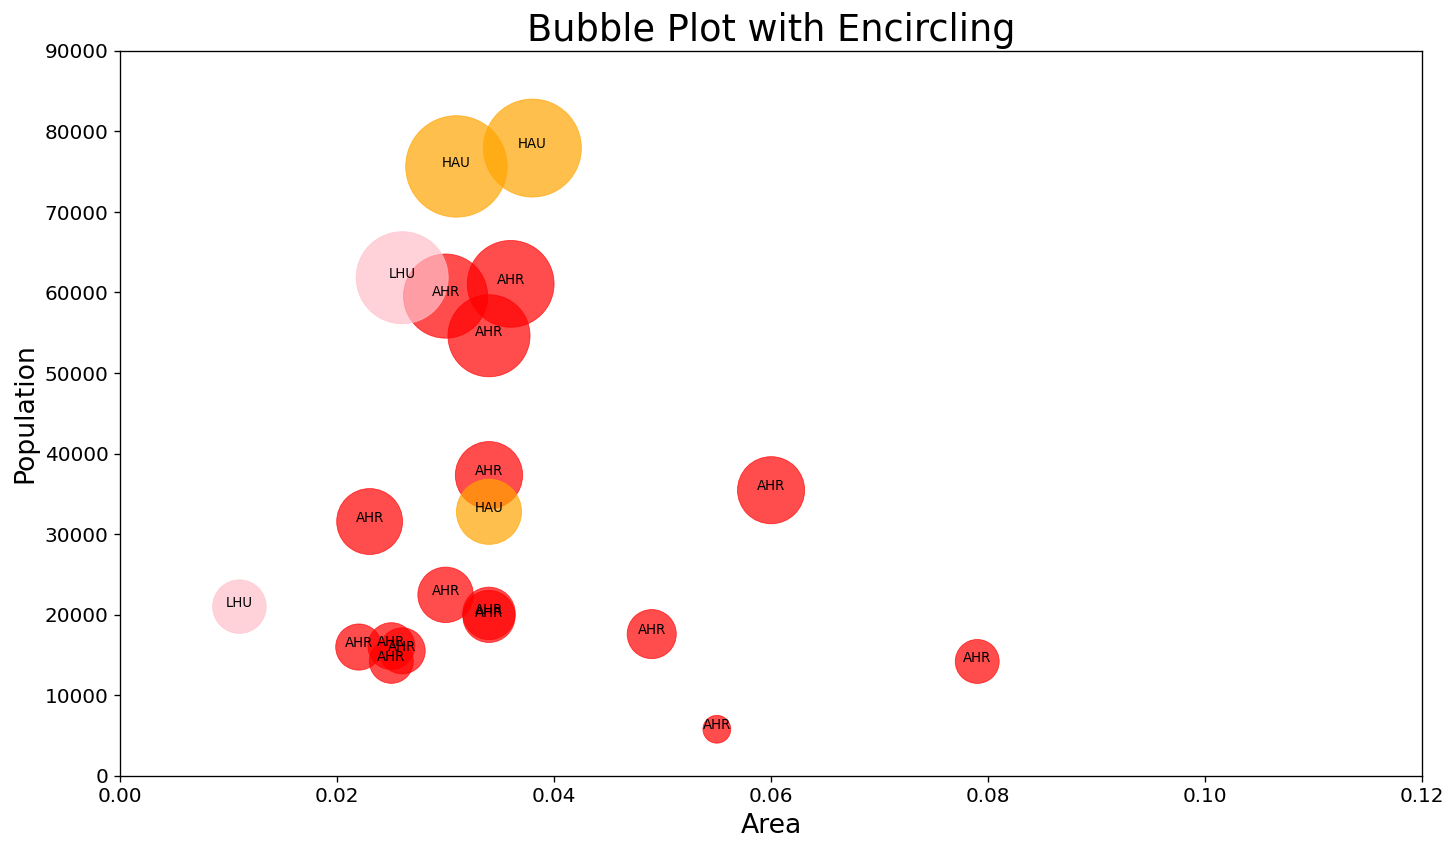

In [38]:
#预设图像的各种属性
large = 22
med = 16
small = 12
params = {
    'axes.titlesize': large, #子图上的标题字体大小
    'legend.fontsize':med, #图例字体大小
    'figure.figsize':(16,10), #画布大小
    'axes.labelsize':med, #标签的字体大小
    'xtick.labelsize':med, #x轴上的标尺的字体大小
    'ytick.labelsize':med, #y轴上的标尺的字体大小
    'figure.titlesize':large #整个画布的标题字体大小
}
plt.rcParams.update(params) #设定各种各样的默认属性
#plt.style.use('seaborn-whitegrid') #设定整体风格
#sns.set_style('white') #设定整体背景风格

#准备标签列表和色彩列表
categories = np.unique(midwest['category'])
colors = ['red', 'orange', 'pink']

#布置画布
fig = plt.figure(figsize = (14,8), dpi = 120, facecolor = 'w', edgecolor = 'k')

#循环绘图
for i, category in enumerate(['AHR', 'HAU', 'LHU']):
    data_ = midwest.loc[midwest.category == category, :]
    data_.index = range(data_.shape[0]) #恢复索引
    plt.scatter('area', 'poptotal' #横坐标和纵坐标
                ,data = data_
                #,s = midwest.loc[midwest.category == category, 'percasian'] * 500
                #,s = midwest.loc[:,'popasian'] #报错，size不同
                ,s = midwest.loc[midwest.category == category, 'poppovertyknown']*0.05 #以该特征为点的尺寸大小
                ,c = colors[i] #点的填充颜色
                ,edgecolors = colors[i] #点的边缘颜色
                ,label = str(category)
                ,alpha = 0.7 #图像的透明度
                ,linewidths = 0.5 #点的边缘的线宽
               )
    for i in range(midwest.loc[midwest.category == category, :].shape[0]):
        plt.text(data_.loc[i,'area']
                 ,data_.loc[i,'poptotal']
                 ,s = data_.loc[i, 'category'] #string的s，不是size的s
                 ,fontdict = {'fontsize':8} #字号字体
                 ,horizontalalignment = 'center' #相对于字符串，气泡显示在中心，还有left【气泡显示在字符串左边（字符串在右边）】和right
                 )

#装饰图像
plt.gca().set(xlim = (0.0,0.12), ylim = (0,90000), xlabel = 'Area', ylabel = 'Population')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Bubble Plot with Encircling', fontsize = 22)
#lgnd = plt.legend(fontsize = 12,markerscale = 0.5)
plt.show()

凸包

In [41]:
from scipy.spatial import ConvexHull
from matplotlib import patches

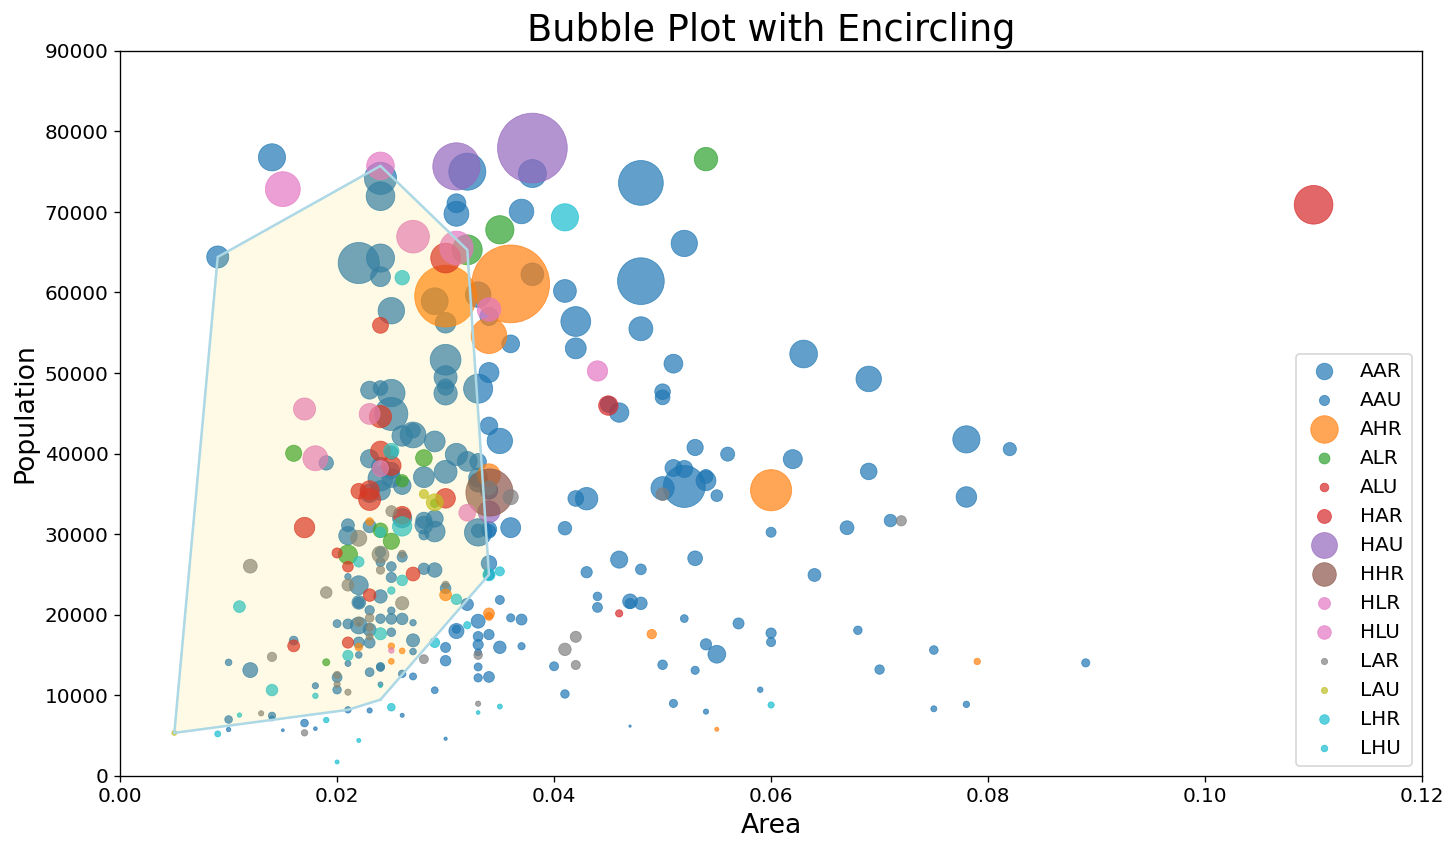

In [42]:
#预设图像的各种属性
large = 22
med = 16
small = 12
params = {
    'axes.titlesize': large, #子图上的标题字体大小
    'legend.fontsize':med, #图例字体大小
    'figure.figsize':(16,10), #画布大小
    'axes.labelsize':med, #标签的字体大小
    'xtick.labelsize':med, #x轴上的标尺的字体大小
    'ytick.labelsize':med, #y轴上的标尺的字体大小
    'figure.titlesize':large #整个画布的标题字体大小
}
plt.rcParams.update(params) #设定各种各样的默认属性
#plt.style.use('seaborn-whitegrid') #设定整体风格
#sns.set_style('white') #设定整体背景风格

#准备标签列表和色彩列表
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

#布置画布
fig = plt.figure(figsize = (14,8), dpi = 120, facecolor = 'w', edgecolor = 'k')

#循环绘图
for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal' #横坐标和纵坐标
                ,data = midwest.loc[midwest.category == category, :]
                #,s = midwest.loc[midwest.category == category, 'percasian'] * 500
                #,s = midwest.loc[:,'popasian'] #报错，size不同
                ,s = 'popasian' #以该特征为点的尺寸大小
                ,c = np.array(colors[i]).reshape(1,-1) #点的填充颜色
                ,edgecolors = np.array(colors[i]).reshape(1,-1) #点的边缘颜色
                ,label = str(category)
                ,alpha = 0.7 #图像的透明度
                ,linewidths = 0.5 #点的边缘的线宽
               )
#定义函数
def encircle(x, y, ax = None, **kw):
    if not ax:
        ax = plt.gca()
        p = np.c_[x, y]
        hull = ConvexHull(p)
        poly = plt.Polygon(p[hull.vertices,:], **kw)
        ax.add_patch(poly)
#定义需要被框起来的数据：所有在IN州中的城市
midwest_encircle_data = midwest.loc[midwest.state == 'IN',:]
#绘制金色的面
encircle(midwest_encircle_data.area
         ,midwest_encircle_data.poptotal
         ,ec = 'k'
         ,fc = 'gold'
         ,alpha = 0.1
        )
#绘制浅蓝色的线
encircle(midwest_encircle_data.area
         ,midwest_encircle_data.poptotal
         ,ec = 'lightblue' #线条颜色
         ,fc = 'none' #填充颜色
         ,linewidth = 1.5 #线宽
        )
#装饰图像
plt.gca().set(xlim = (0.0,0.12), ylim = (0,90000), xlabel = 'Area', ylabel = 'Population')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Bubble Plot with Encircling', fontsize = 22)
lgnd = plt.legend(fontsize = 12
                  ,markerscale = 0.5 #现有气泡的比例
                 )
plt.show()

为什么将散点框起来

In [43]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(1) #随机模式1号

#random.randn：取出符合标准正态分布的随机数
#random.normal：取出符合正态分布的随机数
x1, y1 = np.random.normal(loc = 5 #正态分布中的均值
                          ,scale = 2 #正态分布中的方差
                          ,size = (2,15) #生成怎样的数据结构，2列，每列15个数据
                         )

In [46]:
x1

array([8.24869073, 3.77648717, 3.9436565 , 2.85406276, 6.73081526,
       0.39692261, 8.48962353, 3.4775862 , 5.63807819, 4.50125925,
       7.92421587, 0.87971858, 4.35516559, 4.23189129, 7.26753888])

In [47]:
y1

array([2.80021747, 4.65514358, 3.24428316, 5.08442749, 6.16563043,
       2.79876165, 7.28944742, 6.80318144, 6.00498868, 6.8017119 ,
       3.63254428, 4.75421955, 3.12846113, 4.46422384, 6.06071093])

In [44]:
x1.shape

(15,)

In [45]:
y1.shape

(15,)

In [48]:
x2, y2 = np.random.normal(loc = 8 #正态分布中的均值
                          ,scale = 2.5 #正态分布中的方差
                          ,size = (2,13) #生成怎样的数据结构，2列，每列15个数据
                         )

In [49]:
x2.shape

(13,)

In [50]:
y2.shape

(13,)

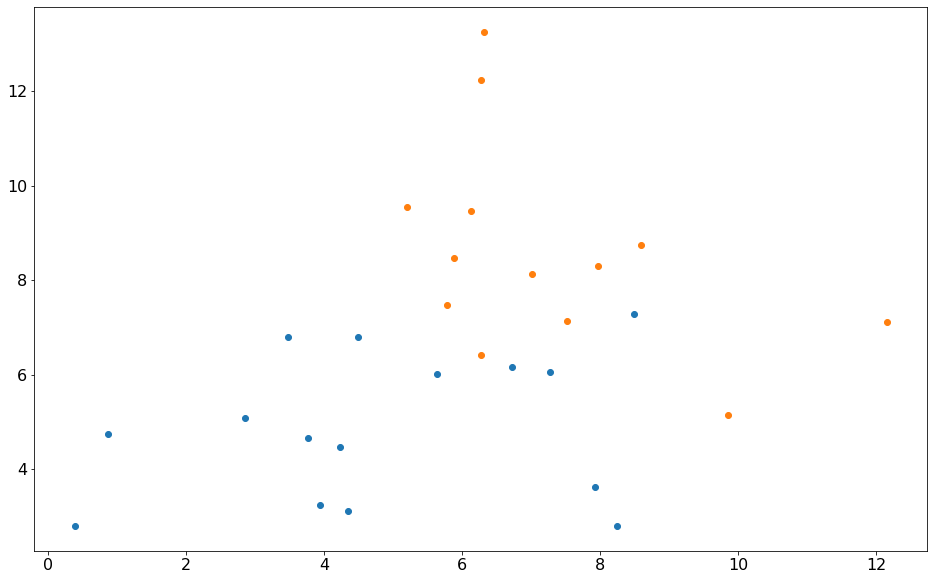

In [51]:
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.show()

我们希望能够绘制一个边界，将同一类点框起来。凸包：包围一组散点的最小凸边形。

类ConvexHull能够帮助我们创建N维凸包。<br>重要参数：<br>points：浮点数组成的n维数组，结构为(点的个数，维度)。表示用来构成凸包的坐标点。<br>incremental：布尔值，可不填。允许不断向类中添加新的数据点。<br>重要属性：<br>vertices：组成凸包的那些数据点在原数据中的索引。

In [52]:
from scipy.spatial import ConvexHull
from matplotlib import patches #给现有图像打补丁的包，即在现有的图像上增加更多的东西

In [53]:
x1

array([8.24869073, 3.77648717, 3.9436565 , 2.85406276, 6.73081526,
       0.39692261, 8.48962353, 3.4775862 , 5.63807819, 4.50125925,
       7.92421587, 0.87971858, 4.35516559, 4.23189129, 7.26753888])

In [54]:
x2

array([ 6.27084812,  7.00811618,  6.28206825,  5.8869859 ,  6.32188467,
        7.9683385 ,  5.20672413,  8.58603924, 12.14950544,  9.8551104 ,
        7.52041112,  5.78092759,  6.13210427])

In [56]:
[*zip(x1,y1)] #元组

[(8.248690727326483, 2.8002174653719383),
 (3.7764871726998495, 4.655143584899129),
 (3.9436564954730886, 3.2442831641572565),
 (2.854062755687659, 5.0844274934311855),
 (6.730815258649357, 6.165630427431644),
 (0.39692260623943465, 2.7987616455741575),
 (8.48962352843296, 7.289447419679228),
 (3.4775861982097944, 6.8031814411855915),
 (5.638078192114197, 6.004988677803737),
 (4.50125924904518, 6.801711898528824),
 (7.924215874089948, 3.6325442816513336),
 (0.8797185810046919, 4.754219548962704),
 (4.355165591972985, 3.1284611314818624),
 (4.231891290663169, 4.464223840747968),
 (7.267538884670875, 6.060710933476372)]

In [58]:
p = np.c_[x1,y1] #array
p

array([[8.24869073, 2.80021747],
       [3.77648717, 4.65514358],
       [3.9436565 , 3.24428316],
       [2.85406276, 5.08442749],
       [6.73081526, 6.16563043],
       [0.39692261, 2.79876165],
       [8.48962353, 7.28944742],
       [3.4775862 , 6.80318144],
       [5.63807819, 6.00498868],
       [4.50125925, 6.8017119 ],
       [7.92421587, 3.63254428],
       [0.87971858, 4.75421955],
       [4.35516559, 3.12846113],
       [4.23189129, 4.46422384],
       [7.26753888, 6.06071093]])

In [59]:
hull = ConvexHull(p)
hull

In [60]:
hull.vertices #凸包的节点

array([ 5,  0,  6,  7, 11], dtype=int32)

In [63]:
p[hull.vertices]

array([[0.39692261, 2.79876165],
       [8.24869073, 2.80021747],
       [8.48962353, 7.28944742],
       [3.4775862 , 6.80318144],
       [0.87971858, 4.75421955]])

In [62]:
p[hull.vertices,:]

array([[0.39692261, 2.79876165],
       [8.24869073, 2.80021747],
       [8.48962353, 7.28944742],
       [3.4775862 , 6.80318144],
       [0.87971858, 4.75421955]])

In [64]:
#定义绘制凸包的函数
def encircle(x, y, ax = None, **kw): #横、纵坐标、子图、
    if not ax: #如果ax not None，即如果ax有值
        ax = plt.gca() #获取当前子图，如果当前子图不存在，就创建新的子图(get current ax)
        p = np.c_[x, y] #.c_功能类似于zip，不过不是生成组合的元组，而是生成拼接起来的数组array
        hull = ConvexHull(p) #将数据集输入到ConvexHull中，自动生成凸包类型的对象
        poly = plt.Polygon(p[hull.vertices,:], **kw)
            #使用属性vertices调用形成凸包的点的索引，进行切片后，利用绘制多边形的类plt.Polygon将形成凸包的点连起来
            #这里的**kw就是定义函数的时候输入的**kw，里面包含了一系列可以绘制多边形的类中进行调节的内容，比如边框颜色、填充颜色和透明度等
        ax.add_patch(poly) #使用add_patch，将生成的多边形作为一个补丁补充到图像上

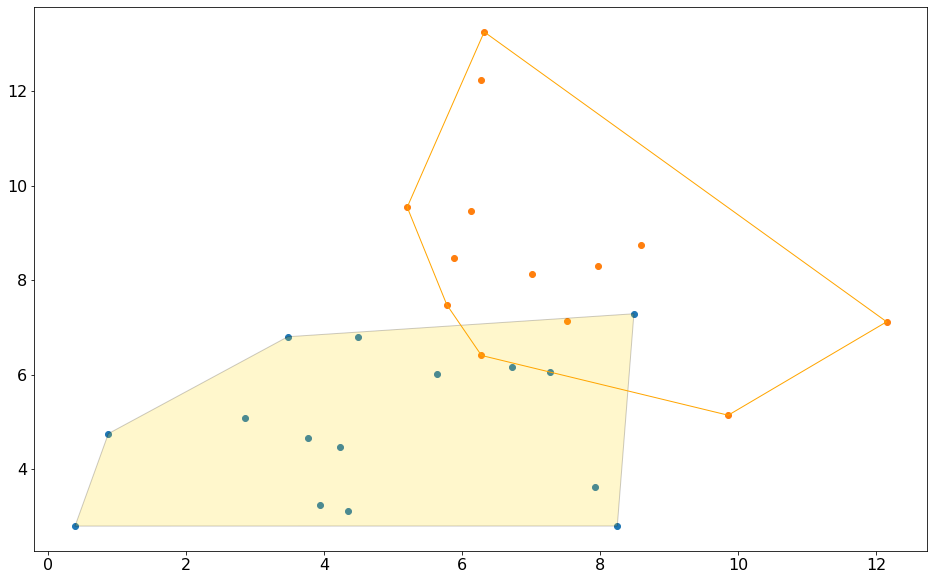

In [66]:
plt.scatter(x1,y1)
plt.scatter(x2,y2)
#蓝色点
encircle(x1
         ,y1
         ,ec = 'k'
         ,fc = 'gold'
         ,alpha = 0.2
        )
#橙色点
encircle(x2,y2,ec='orange',fc='none')
plt.show()